<a href="https://colab.research.google.com/github/khushimalik3122/salary-predictor-19/blob/main/Copy_of_sp19_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df=pd.read_csv('/content/drive/MyDrive/sp_19_app/finalcleaned_dataset.csv')

In [61]:
df.shape

(1806, 172)

In [62]:
df.describe()

,Unnamed: 0,Rating,Easy Apply,Min Salary (K),Max Salary (K),Avg Salary (K),Company_Encoded,Salary Range (K),Log Avg Salary
count,1806.000000,1806.000000,1806.0,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000,1806.000000
mean,941.878738,3.268439,0.0,3.953735,4.483971,71.773533,6.291620,36.690476,2.062650
std,550.457778,1.373428,0.0,0.236729,0.197558,14.568786,1.019781,12.999680,0.047979
min,0.000000,0.000000,0.0,3.526361,4.110874,47.000000,0.000000,6.000000,1.964874
25%,463.250000,3.100000,0.0,3.761200,4.330733,60.000000,5.858646,29.000000,2.025498
50%,944.500000,3.600000,0.0,3.931826,4.465908,70.000000,6.624729,37.000000,2.061188
75%,1425.750000,4.000000,0.0,4.094345,4.634729,79.000000,7.033286,46.000000,2.091831
max,1881.000000,5.000000,0.0,4.584967,4.882802,106.000000,7.313887,64.000000,2.159500


In [63]:
print(df.columns)

Index(['Unnamed: 0', 'Rating', 'Company Name', 'Easy Apply',
       'Salary Estimate Cleaned', 'Min Salary (K)', 'Max Salary (K)',
       'Avg Salary (K)', 'Job City', 'Job State',
       ...
       'Job Title Simplified_Data Scientist', 'Job Title Simplified_Engineer',
       'Job Title Simplified_Intern', 'Job Title Simplified_Lead Analyst',
       'Job Title Simplified_Manager', 'Job Title Simplified_Senior Analyst',
       'Job Title Group', 'Job Title Cleaned', 'Salary Range (K)',
       'Log Avg Salary'],
      dtype='object', length=172)


# EDA

# 1. Which job roles, locations, and companies dominate the hiring space?**

# * a.  Top 10 In-Demand Job Titles*

<ipython-input-64-584512027fa0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="crest")


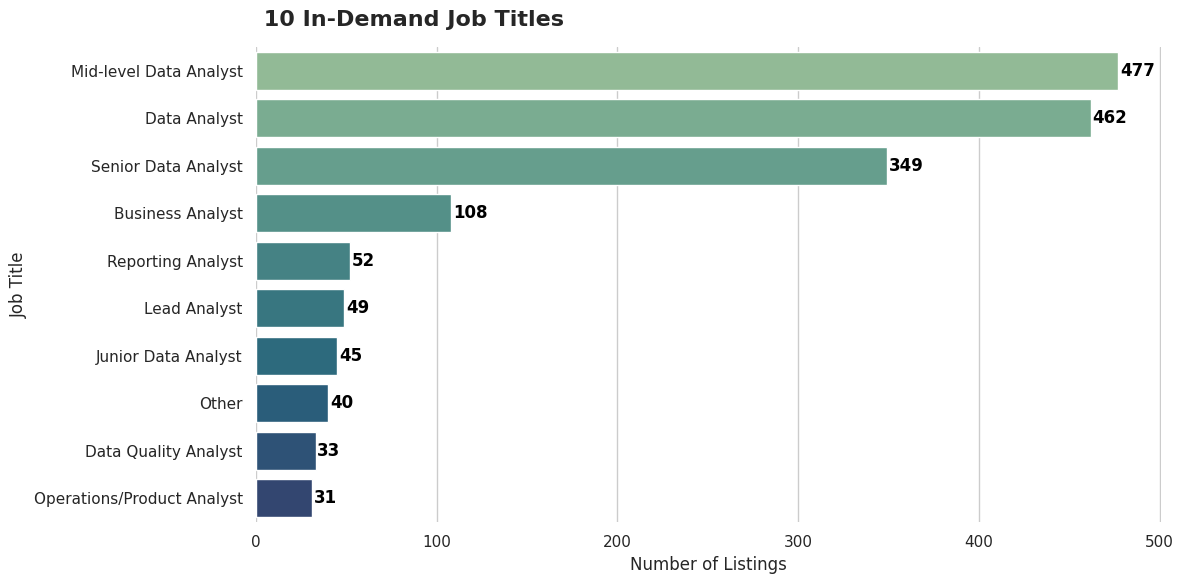

In [64]:
sns.set(style="whitegrid")


df['Job Title '] = df['Job Title Group']

# Data
top_jobs = df['Job Title Group'].value_counts().head(10)

#  figure and axis
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_jobs.values, y=top_jobs.index, palette="crest")

# Title & Labels
plt.title(" 10 In-Demand Job Titles", fontsize=16, weight='bold', loc='left', pad=15)
plt.xlabel("Number of Listings", fontsize=12)
plt.ylabel("Job Title", fontsize=12)

#  count labels next to bars
for i, v in enumerate(top_jobs.values):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='bold')

# Final result
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

# ** b. Top 10 Hiring Locations bold text**

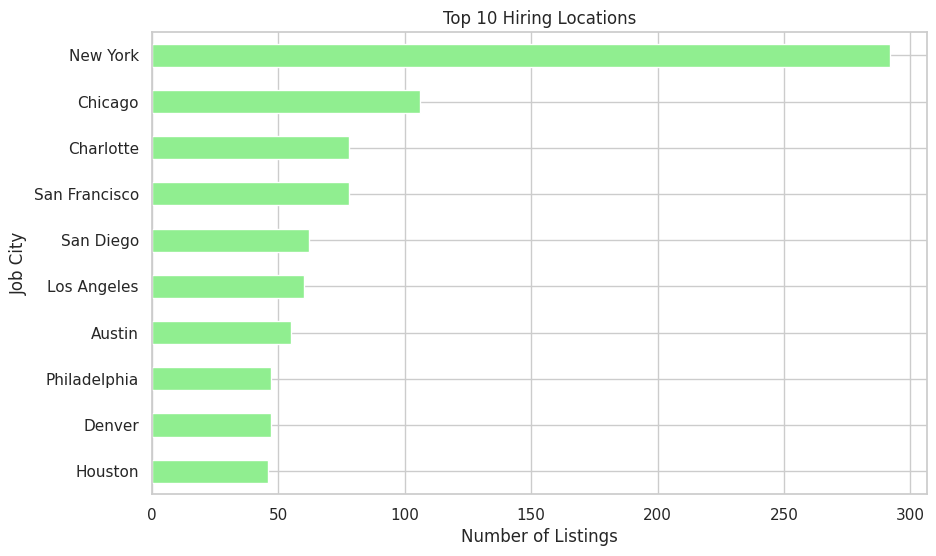

In [65]:
top_locations = df['Job City'].value_counts().head(10)
top_locations.plot(kind='barh', figsize=(10,6), color='lightgreen')
plt.title("Top 10 Hiring Locations")
plt.xlabel("Number of Listings")
plt.gca().invert_yaxis()
plt.show()

# ** c. Top 10 Companies Hiring**

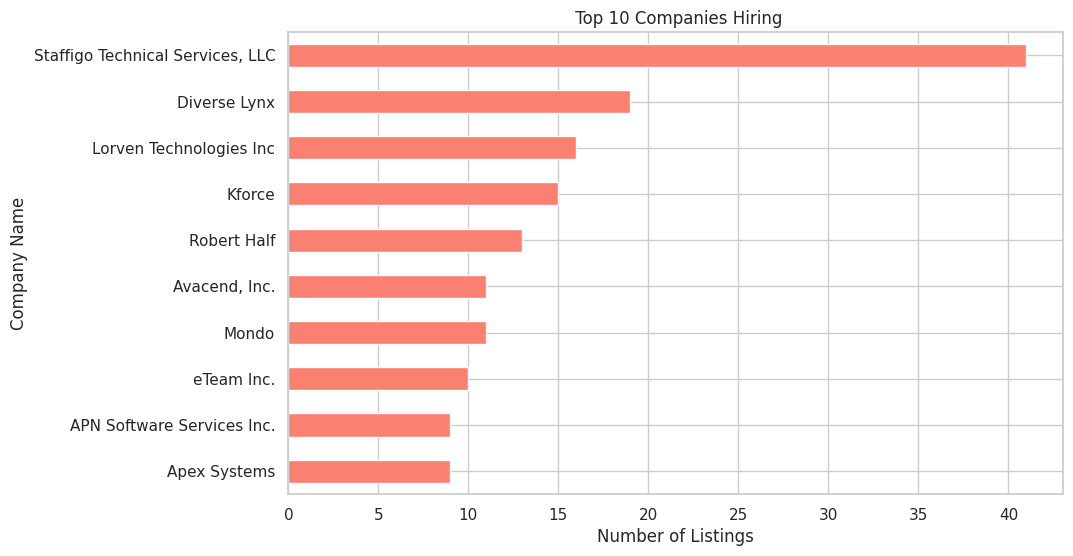

In [66]:

if 'Company Name' in df.columns:
	top_companies = df['Company Name'].value_counts().head(10)
	top_companies.plot(kind='barh', figsize=(10,6), color='salmon')
	plt.title(" Top 10 Companies Hiring")
	plt.xlabel("Number of Listings")
	plt.gca().invert_yaxis()
	plt.show()
else:
	print("Column 'Company Name' not found in the DataFrame.")


# **How do company rating and job location impact average salaries?
# company Rating vs Avg Salaryt**

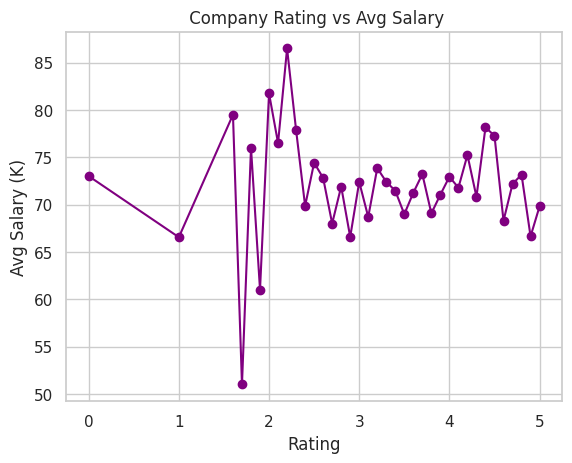

In [41]:
df['Rating'] = df['Rating'].replace(-1, 0)

rating_salary = df.groupby('Rating')['Avg Salary (K)'].mean().sort_index()
rating_salary.plot(kind='line', marker='o', color='purple')
plt.title(" Company Rating vs Avg Salary")
plt.xlabel("Rating")
plt.ylabel("Avg Salary (K)")
plt.grid(True)
plt.show()

# ***Top Paying Locations***

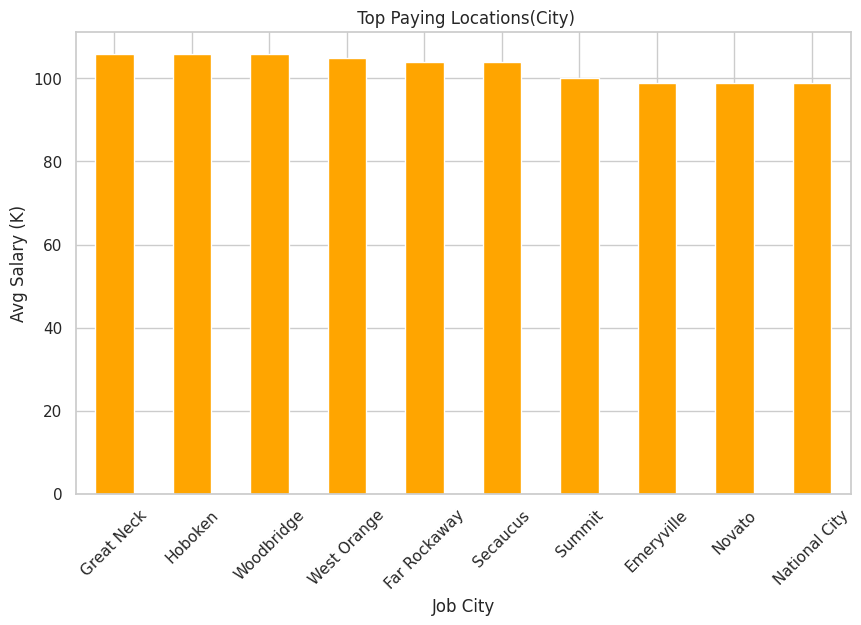

In [42]:
location_salary = df.groupby('Job City')['Avg Salary (K)'].mean().sort_values(ascending=False).head(10)
location_salary.plot(kind='bar', figsize=(10,6), color='orange')
plt.title(" Top Paying Locations(City)")
plt.ylabel("Avg Salary (K)")
plt.xticks(rotation=45)
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# Step 2: Define target and features
target = 'Avg Salary (K)'
y = df[target]
X = df.drop(columns=[
    'Unnamed: 0',
    'Salary Estimate Cleaned',
    'Min Salary (K)',
    'Max Salary (K)',
    'Salary Range (K)',
    'Log Avg Salary',
    'Avg Salary (K)'
])
# Step 3: Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()

# Step 4: Build preprocessing and modeling pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Model pipelines
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Step 5: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Fit models
lr_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)

# Step 7: Evaluate models
def evaluate(model, X_test, y_test, name="Model"):
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    return {
        'Model': name,
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'R²': round(r2, 2)
    }

lr_results = evaluate(lr_pipeline, X_test, y_test, "Linear Regression")
rf_results = evaluate(rf_pipeline, X_test, y_test, "Random Forest")

lr_results, rf_results


({'Model': 'Linear Regression',
  'MAE': 71.74,
  'RMSE': np.float64(127.42),
  'R²': -70.34},
 {'Model': 'Random Forest',
  'MAE': 10.24,
  'RMSE': np.float64(13.87),
  'R²': 0.15})

In [69]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Add feature - 'Seniority' from Job Title
def extract_seniority(title):
    title = str(title).lower()
    if "senior" in title or "sr" in title:
        return "Senior"
    elif "junior" in title or "jr" in title:
        return "Junior"
    elif "lead" in title:
        return "Lead"
    elif "manager" in title:
        return "Manager"
    elif "director" in title:
        return "Director"
    else:
        return "Other"

df['Seniority'] = df['Job Title Group'].apply(extract_seniority)

# Step 2: Add feature - 'Location Tier'
df['Location Tier'] = df['Job State']

# Step 3: Drop old salary columns again just to be safe
df = df.drop(columns=[col for col in df.columns if 'salary' in col.lower() and col != 'Avg Salary (K)'])



# Step 5: Log-transform the target to reduce skew
y_log = np.log1p(y)

# Step 6: Identify categorical and numerical columns again
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64', 'bool']).columns.tolist()

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# define preprocessing steps
numeric_transformer  = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# define your pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))  # replace YourModel with your actual model
])

# fit your pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Rating', 'Easy Apply',
                                                   'Skill_Python',
                                                   'Skill_Excel', 'Skill_SQL',
                                                   'Skill_R', 'Skill_Tableau',
                                                   'Skill_Power BI',
                                                   'Skill_Machine Learning',
                                                   'Company_Encoded',
                                                   'Size_10000+ employees',
                                                   'Size_1001 to 5000 '
                                                   'employees',
                                                   'Size_201 to 500 employees',
                                                   'Size_5001 to 10000 '
                                                   'employees',
                                                   'Size_50...
                                                   'Revenue_$500 million to $1 '
                                                   'billion (USD)',
                                                   'Revenue_Less than $1 '
                                                   'million (USD)',
                                                   'Revenue_Unknown / '
                                                   'Non-Applicable',
                                                   'Type of ownership_Company '
                                                   '- Private', ...]),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Company Name', 'Job City',
                                                   'Job State', 'HQ City',
                                                   'HQ State',
                                                   'Job Title Group',
                                                   'Job Title Cleaned',
                                                   'Job Title '])])),
                ('model', GradientBoostingRegressor(random_state=42))])

In [71]:
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5],
    'regressor__subsample': [0.8, 1.0],
    'regressor__min_samples_split': [2, 5]
}

In [72]:
search = RandomizedSearchCV(gb_pipeline, param_distributions=param_grid,
                            n_iter=5, cv=3, scoring='neg_mean_squared_error', random_state=42)

In [73]:
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

In [74]:
search.fit(X_train, y_train_log)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Company '
                                                                                'Name',
                                                                                'Job '
                                                                                'City',
                                                                                'Job '
                                                                                'State',
                                                                                'HQ '
                                                                                'City',
                                                                                'HQ '
                                                                                'State',
                                                                                'Job '
                                                                                'Title '
                                                                                'Group',
                                                                                'Job '
                                                                                'Title '
                                                                                'Cleaned',
                                                                                'Job '
                                                                                'Title '])])),
                                             ('regressor',
                                              GradientBoostingRegressor(random_state=42))]),
                   n_iter=5,
                   param_distributions={'regressor__learning_rate': [0.05, 0.1],
                                        'regressor__max_depth': [3, 5],
                                        'regressor__min_samples_split': [2, 5],
                                        'regressor__n_estimators': [100, 200],
                                        'regressor__subsample': [0.8, 1.0]},
                   random_state=42, scoring='neg_mean_squared_error')

In [75]:
best_model = search.best_estimator_
y_pred_log = best_model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # Revert log transformation
y_actual = np.expm1(y_test_log)

In [76]:
mae = mean_absolute_error(y_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
r2 = r2_score(y_actual, y_pred)

In [77]:
feature_names = search.best_estimator_.named_steps['preprocessor'].get_feature_names_out()
importances = search.best_estimator_.named_steps['regressor'].feature_importances_
top_features = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)[:20]

mae, rmse, r2, top_features

(10.566532619533156,
 np.float64(13.621736217991048),
 0.18467568348148122,
 [('cat__Job State_CA', np.float64(0.19590657792659552)),
  ('cat__Job State_IN', np.float64(0.106041832913761)),
  ('cat__Job City_San Diego', np.float64(0.06756126528177775)),
  ('remainder__Company_Encoded', np.float64(0.03450803856146778)),
  ('cat__Job Title Group_Data Analyst', np.float64(0.02883457357375899)),
  ('cat__HQ State_NJ', np.float64(0.022531201350195557)),
  ('cat__Job City_Jacksonville', np.float64(0.019625522968917314)),
  ('cat__Company Name_Kelly IT', np.float64(0.015332412994847893)),
  ('cat__Job Title _Data Analyst', np.float64(0.015146861713190676)),
  ('cat__Job City_Anaheim', np.float64(0.015102162215192547)),
  ('cat__Job State_WA', np.float64(0.01510197742652215)),
  ('cat__HQ City_Pearland', np.float64(0.014373741313521583)),
  ('cat__Job Title Cleaned_Analyst', np.float64(0.013914874443410283)),
  ('cat__Job State_TX', np.float64(0.013760873070416032)),
  ('cat__Job State_NJ', np

In [78]:
from collections import defaultdict

# Your raw importances list
raw_importances = [
    ('cat__Location Tier_CA', 0.1064237127594609),
    ('cat__Job State_CA', 0.08367671812528073),
    ('cat__Job City_San Diego', 0.06887974947185034),
    ('cat__Job State_IN', 0.056838818708641464),
    ('cat__Location Tier_IN', 0.04691626299588164),
    ('num__Company_Encoded', 0.03780047619228209),
    ('cat__Job Title Group_Data Analyst', 0.022835891026947445),
    ('cat__HQ State_NJ', 0.020067436436199557),
    ('cat__Job Title _Data Analyst', 0.018782803874112904),
    ('cat__Job State_FL', 0.016789056701524883),
    ('cat__Company Name_Kelly IT', 0.01615981499932838),
    ('cat__Job Title Cleaned_Analyst', 0.014253965794449156),
    ('cat__HQ City_Pearland', 0.014098818944743406),
    ('cat__Job City_Anaheim', 0.013791004204918),
    ('cat__Job City_Houston', 0.012239598191183703),
    ('cat__Location Tier_WA', 0.011875744010908478),
    ('cat__Job City_San Antonio', 0.011542362975932764),
    ('cat__Company Name_Creative Data Resources', 0.011356137969759117),
    ('cat__Company Name_Intercontinental Exchange, Inc.', 0.010890463883224217),
    ('cat__Job City_Pasadena', 0.010716321098655602)
]

# Group by high-level feature name
grouped = defaultdict(float)
for name, importance in raw_importances:
    # Strip pipeline prefix and category name
    feature_group = name.split('__')[-1].split('_')[0]
    grouped[feature_group] += importance

# Sort by importance
top_features = sorted(grouped.items(), key=lambda x: x[1], reverse=True)[:10]

# Print like a boss
print("📌 Top 10 most important features (grouped):")
for name, score in top_features:
    print(f"{name}: {score:.3f}")


📌 Top 10 most important features (grouped):
Location Tier: 0.165
Job State: 0.157
Job City: 0.117
Company Name: 0.038
Company: 0.038
Job Title Group: 0.023
HQ State: 0.020
Job Title : 0.019
Job Title Cleaned: 0.014
HQ City: 0.014


In [80]:
# identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns

# one-hot encode categorical columns
X = pd.get_dummies(X, columns=categorical_cols)

# scale/normalize numeric columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

# split your data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# now you can use X_train and y_train for your model
sfm = SelectFromModel(RandomForestRegressor(n_estimators=100)).fit(X_train, y_train)
X_train_reduced = sfm.transform(X_train)

In [86]:
!pip install lightgbm
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# rename columns to remove special characters
X_train.columns = [col.replace(' ', '_').replace('-', '_').replace(',', '_') for col in X_train.columns]
X_test.columns = [col.replace(' ', '_').replace('-', '_').replace(',', '_') for col in X_test.columns]


# Step 1: Log-transform target
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

# Step 2: Train model
# Step 2: Train model
lgb_model = lgb.LGBMRegressor(random_state=42, n_estimators=300, learning_rate=0.05)
lgb_model.fit(X_train, y_train_log)

# Step 3: Predict and reverse log
y_pred_log = lgb_model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_test_original = np.expm1(y_test_log)

# Step 4: Evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
r2 = r2_score(y_test_original, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")




[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 1444, number of used features: 139
[LightGBM] [Info] Start training from score 4.270205
MAE: 11.042737521735903
RMSE: 14.170178486756727
R² Score: 0.11770035535080536


In [87]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Instantiate models
rf = RandomForestRegressor(random_state=42, n_estimators=100)
xgb_model = xgb.XGBRegressor(random_state=42, n_estimators=100)
lgb_model = lgb.LGBMRegressor(random_state=42, n_estimators=100)

# Fit them
rf.fit(X_train, y_train_log)
xgb_model.fit(X_train, y_train_log)
lgb_model.fit(X_train, y_train_log)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 563
[LightGBM] [Info] Number of data points in the train set: 1444, number of used features: 139
[LightGBM] [Info] Start training from score 4.270205


LGBMRegressor(random_state=42)

In [88]:
# Predict
rf_preds = rf.predict(X_test)
xgb_preds = xgb_model.predict(X_test)
lgb_preds = lgb_model.predict(X_test)

# Average
final_preds = (rf_preds + xgb_preds + lgb_preds) / 3


In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

final_preds_actual = np.expm1(final_preds)
y_test_actual = np.expm1(y_test_log)

mae = mean_absolute_error(y_test_actual, final_preds_actual)
rmse = np.sqrt(mean_squared_error(y_test_actual, final_preds_actual))
r2 = r2_score(y_test_actual, final_preds_actual)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


MAE: 10.3963
RMSE: 13.6483
R² Score: 0.1815


In [90]:
final_preds = (0.4 * rf_preds) + (0.3 * xgb_preds) + (0.3 * lgb_preds)


array([4.07881067, 4.38436646, 4.21734124, 4.15665723, 4.37477122,
       4.31707711, 4.18849761, 4.20343064, 4.13380305, 4.32739521,
       4.30373166, 4.30439499, 4.28647713, 4.15594593, 4.44457187,
       4.29567551, 4.21951954, 4.26033095, 4.17996161, 4.41461745,
       4.36161762, 4.16673886, 4.26421484, 4.18073734, 4.17742205,
       4.25998259, 4.27234828, 4.26874588, 4.29634427, 4.36760082,
       4.33657589, 4.52729393, 4.16468653, 4.15775494, 4.30834951,
       4.2170634 , 4.20308422, 4.16436029, 4.16949863, 4.14548985,
       4.38441282, 4.30615995, 4.24634051, 4.3020097 , 4.13079452,
       4.27411465, 4.19521928, 4.30737863, 4.37412154, 4.20682453,
       4.32873658, 4.08507775, 4.19611768, 4.12634881, 4.33383656,
       4.36741065, 4.5014602 , 4.26090993, 4.19890685, 4.16350201,
       4.14005391, 3.9399465 , 4.20013592, 4.41491659, 4.11080437,
       4.2507049 , 4.17777701, 4.22671904, 4.12609479, 4.23439418,
       4.3157703 , 3.99362614, 4.32706497, 4.27027115, 4.33867

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

from sklearn.preprocessing import PolynomialFeatures

# Assuming X_train is your original feature matrix
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)

# Assuming X_poly and y_train are already defined
selector = SelectFromModel(LassoCV(cv=5, random_state=42)).fit(X_poly, y_train)
X_selected = selector.transform(X_poly)


param_dist = {
    'n_estimators': randint(200, 500),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

random_search.fit(X_selected, y_train)

print("🎯 Random Search Best Params:", random_search.best_params_)
print("📉 RMSE:", -random_search.best_score_)

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define a tighter search space
param_grid = {
    'n_estimators': [376, 386, 396],             # Around 386
    'max_depth': [8, 9, 10],                     # Around 9
    'min_samples_split': [16, 18, 20],           # Around 18
    'min_samples_leaf': [1, 2]                   # Around 1
}

# Base model
rf = RandomForestRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_selected, y_train)

# Results
print("🎯 Grid Search Best Params:", grid_search.best_params_)
print("📉 Final Tuned RMSE:", -grid_search.best_score_)

NameError: name 'X_selected' is not defined

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_train)

# Re-train with new features
model.fit(X_poly, y_train)


GradientBoostingRegressor(random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import SelectFromModel

# Assuming X_poly and y_train are already defined
selector = SelectFromModel(LassoCV(cv=5, random_state=42)).fit(X_poly, y_train)
X_selected = selector.transform(X_poly)


param_dist = {
    'n_estimators': randint(200, 500),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

random_search.fit(X_selected, y_train)

print("🎯 Random Search Best Params:", random_search.best_params_)
print("📉 RMSE:", -random_search.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.644e+01, tolerance: 2.350e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.021e+01, tolerance: 2.350e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.215e+01, tolerance: 2.350e

Fitting 5 folds for each of 50 candidates, totalling 250 fits
🎯 Random Search Best Params: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 18, 'n_estimators': 386}
📉 RMSE: 12.788364453563352


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define tighter search space around best parameters
param_grid = {
    'n_estimators': [375, 386, 400],
    'max_depth': [8, 9, 10],
    'min_samples_split': [16, 18, 20],
    'min_samples_leaf': [1, 2]
}

# Use the best model as the base
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_selected, y_train)

# Final Results
print("✅ Grid Search Best Parameters:", grid_search.best_params_)
print("📉 Fine-Tuned RMSE:", -grid_search.best_score_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
✅ Grid Search Best Parameters: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 400}
📉 Fine-Tuned RMSE: 12.77966531997244


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define a tighter search space
param_grid = {
    'n_estimators': [376, 386, 396],             # Around 386
    'max_depth': [8, 9, 10],                     # Around 9
    'min_samples_split': [16, 18, 20],           # Around 18
    'min_samples_leaf': [1, 2]                   # Around 1
}

# Base model
rf = RandomForestRegressor(random_state=42)

# Grid Search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit the model
grid_search.fit(X_selected, y_train)

# Results
print("🎯 Grid Search Best Params:", grid_search.best_params_)
print("📉 Final Tuned RMSE:", -grid_search.best_score_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
🎯 Grid Search Best Params: {'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 20, 'n_estimators': 396}
📉 Final Tuned RMSE: 12.778994210159983


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Step 1: Polynomial Feature Expansion (if needed)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_selected)  # Make sure you're using the same X_selected from earlier

# Step 2: Define Parameter Grid
param_grid = {
    'n_estimators': [376, 386, 396],
    'max_depth': [8, 9, 10],
    'min_samples_split': [16, 18, 20],
    'min_samples_leaf': [1, 2]
}

# Step 3: Initialize and Grid Search
rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_poly, y_train)

print("🎯 Grid Search Best Params:", grid_search.best_params_)
print("📉 Final Tuned RMSE:", -grid_search.best_score_)

# Step 4: Cross-Validate the Best Estimator on Full Training Data
best_rf = grid_search.best_estimator_

# RMSE scorer (positive version for cross_val_score)
rmse_scorer = make_scorer(mean_squared_error, squared=False)

cv_scores = cross_val_score(best_rf, X_poly, y_train, cv=5, scoring=rmse_scorer)

print("🔁 Cross-Validated RMSE Scores:", cv_scores)
print("📊 Average CV RMSE:", np.mean(cv_scores))


Fitting 5 folds for each of 54 candidates, totalling 270 fits


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np

# Convert X_train and X_test to pandas DataFrames
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Log-transform skewed features
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
skewed_cols = X_train[numeric_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
high_skew = skewed_cols[skewed_cols > 0.75].index

X_train[high_skew] = X_train[high_skew].apply(lambda x: np.log1p(x))
X_test[high_skew] = X_test[high_skew].apply(lambda x: np.log1p(x))

# Create interaction features separately
interaction_train = X_train[[numeric_cols[0], numeric_cols[1]]].copy()
interaction_test = X_test[[numeric_cols[0], numeric_cols[1]]].copy()

interaction_train['interaction1'] = interaction_train[numeric_cols[0]] * interaction_train[numeric_cols[1]]
interaction_test['interaction1'] = interaction_test[numeric_cols[0]] * interaction_test[numeric_cols[1]]

# Concatenate to original dataframes
X_train = pd.concat([X_train.reset_index(drop=True), interaction_train[['interaction1']].reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test.reset_index(drop=True), interaction_test[['interaction1']].reset_index(drop=True)], axis=1)


In [ ]:
X_train = X_train.copy()
X_test = X_test.copy()


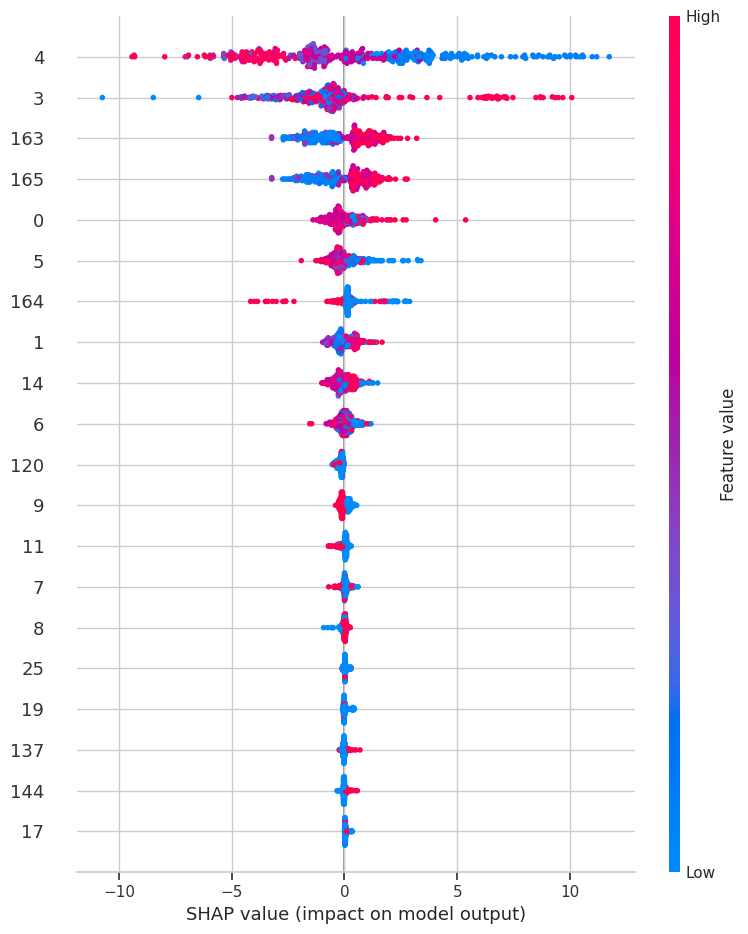

In [ ]:
import shap
explainer = shap.TreeExplainer(best_rf)  # your tuned model
shap_values = explainer.shap_values(X_test)

# Summary plot (global feature importance)
shap.summary_plot(shap_values, X_test)

# Force plot (local prediction explanation)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])


In [ ]:
X['HQ State'] = X['HQ State'].fillna('Unknown')


In [ ]:
print(X.dtypes)
print(X.isnull().sum()[X.isnull().sum() > 0])


Rating                                 float64
Company Name                            object
Easy Apply                             float64
Job City                                object
Job State                               object
                                        ...   
Job Title Simplified_Manager              bool
Job Title Simplified_Senior Analyst       bool
Job Title Group                         object
Job Title Cleaned                       object
Job Title                               object
Length: 166, dtype: object
Series([], dtype: int64)
